Importo i moduli necessari per procedere con l'analisi dei dati e carico il file in .json fornito dal dipartimento della Protezione Civile del Ministero dell'Interno.

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
import json
with open('dpc-covid19-ita-province.json') as f:
         province = json.load(f)

Un piccolo controllo del file caricato

In [19]:
province

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 69,
  'denominazione_provincia': 'Chieti',
  'sigla_provincia': 'CH',
  'lat': 42.35103167,
  'long': 14.16754574,
  'totale_casi': 0,
  'note_it': '',
  'note_en': ''},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 66,
  'denominazione_provincia': "L'Aquila",
  'sigla_provincia': 'AQ',
  'lat': 42.35122196,
  'long': 13.39843823,
  'totale_casi': 0,
  'note_it': '',
  'note_en': ''},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 68,
  'denominazione_provincia': 'Pescara',
  'sigla_provincia': 'PE',
  'lat': 42.46458398,
  'long': 14.21364822,
  'totale_casi': 0,
  'note_it': '',
  'note_en': ''},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'deno

Abbiamo una lista di dizionari, formato perfetto per creare un DataFrame con il modulo Pandas.

In [20]:
df_province = pd.DataFrame(province)

In [21]:
df_province.describe()

,codice_regione,codice_provincia,lat,long,totale_casi
count,15232.000000,15232.000000,15232.000000,15232.000000,15232.000000
mean,10.687500,207.523438,35.868843,10.112000,1182.619551
std,6.127433,347.394432,16.072052,5.097760,2442.723419
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,5.750000,32.750000,38.848542,8.583304,39.000000
50%,10.000000,64.500000,42.609815,11.188560,350.000000
75%,16.000000,96.250000,44.947714,13.593962,1155.250000
max,22.000000,999.000000,46.499335,18.171897,24161.000000


In [22]:
df_province['data'] = pd.to_datetime(df_province['data'])

In [23]:
df_province['data'][208]

Timestamp('2020-02-25 18:00:00')

In [25]:
df_province['data'][208==25/02/2020]

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-25-e46cd8d526f2>, line 1)

In [8]:
#day = []
#for i in df_province['data']:
#    day.append(i - df_province['data'][0])
#df_province['day'] = day

In [9]:
df_province

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
15227,2020-06-21 17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2667,,
15228,2020-06-21 17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2680,,
15229,2020-06-21 17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,5121,,
15230,2020-06-21 17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2858,,


In [13]:
df_province = df_province.set_index(['data', 'sigla_provincia'])

In [17]:
df_province = df_province.drop(['data', 'sigla_provincia'], axis=1)

In [15]:
df_province

stato  codice_regione  \
data                sigla_provincia                         
2020-02-24 18:00:00 CH                ITA              13   
                    AQ                ITA              13   
                    PE                ITA              13   
                    TE                ITA              13   
                                      ITA              13   
...                                   ...             ...   
2020-06-21 17:00:00 TV                ITA               5   
                    VE                ITA               5   
                    VR                ITA               5   
                    VI                ITA               5   
                                      ITA               5   

                                    denominazione_regione  codice_provincia  \
data                sigla_provincia                                           
2020-02-24 18:00:00 CH                            Abruzzo                69   
                    AQ                            Abruzzo                66   
                    PE                            Abruzzo                68   
                    TE                            Abruzzo                67   
                                                  Abruzzo               979   
...                                                   ...               ...   
2020-06-21 17:00:00 TV                             Veneto                26   
                    VE                             Veneto                27   
                    VR                             Veneto                23   
                    VI                             Veneto                24   
                                                   Veneto               999   

                                                  denominazione_provincia  \
data                sigla_provincia                                         
2020-02-24 18:00:00 CH                                             Chieti   
                    AQ                                           L'Aquila   
                    PE                                            Pescara   
                    TE                                             Teramo   
                                     In fase di definizione/aggiornamento   
...                                                                   ...   
2020-06-21 17:00:00 TV                                            Treviso   
                    VE                                            Venezia   
                    VR                                             Verona   
                    VI                                            Vicenza   
                                     In fase di definizione/aggiornamento   

                                           lat       long  totale_casi  \
data                sigla_provincia                                      
2020-02-24 18:00:00 CH               42.351032  14.167546            0   
                    AQ               42.351222  13.398438            0   
                    PE               42.464584  14.213648            0   
                    TE               42.658918  13.704400            0   
                                      0.000000   0.000000            0   
...                                        ...        ...          ...   
2020-06-21 17:00:00 TV               45.667546  12.245074         2667   
                    VE               45.434905  12.338452         2680   
                    VR               45.438390  10.993527         5121   
                    VI               45.547497  11.545971         2858   
                                      0.000000   0.000000          347   

                                    note_it note_en  
data                sigla_provincia                  
2020-02-24 18:00:00 CH                               
                    AQ                               
                    PE           

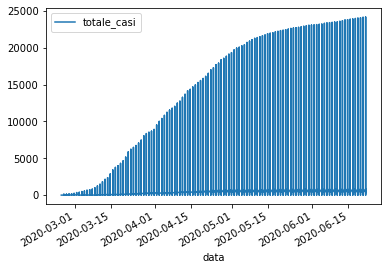

In [13]:
df_province.plot(x='data', y='totale_casi');

In [11]:
MI_totalecasi = df_province.loc[df_province.sigla_provincia=='MI', ['totale_casi']]

In [10]:
day = df_province.loc[df_province.sigla_provincia=='MI', ['day']]

In [26]:
df_province.groupby('totale_casi').mean()

,codice_regione,codice_provincia,lat,long
totale_casi,,,,
0,13.259386,638.216480,15.903215,4.793786
1,12.808642,119.753086,39.201199,11.842983
2,14.459821,590.200893,17.779969,5.411033
3,11.709924,160.557252,37.663638,11.562093
4,11.553191,302.117021,31.333003,9.348123
...,...,...,...,...
23966,3.000000,15.000000,45.466794,9.190347
24018,3.000000,15.000000,45.466794,9.190347
24061,3.000000,15.000000,45.466794,9.190347


In [21]:
df_province?

In [17]:
df_province.groupby('sigla_provincia')['totale_casi'].last()

sigla_provincia
       347
AG     135
AL    4058
AN    1876
AO    1193
      ... 
VE    2680
VI    2858
VR    5121
VT     428
VV      84
Name: totale_casi, Length: 108, dtype: int64

In [56]:
df_province.groupby(['data', 'sigla_provincia'])['totale_casi'].last().unstack()

sigla_provincia,,AG,AL,AN,AO,AP,AQ,AR,AT,AV,...,TV,UD,VA,VB,VC,VE,VI,VR,VT,VV
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-25 18:00:00,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,7,0,0,0,0
2020-02-26 18:00:00,21,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,8,0,0,0,0
2020-02-27 18:00:00,13,0,0,0,0,0,0,0,0,0,...,22,0,0,0,0,14,3,0,0,0
2020-02-28 18:00:00,42,0,0,0,0,0,0,0,0,0,...,23,0,3,0,0,15,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 17:00:00,343,141,4034,1876,1191,290,246,686,1867,550,...,2666,994,3829,1118,1315,2679,2855,5113,428,83
2020-06-18 17:00:00,344,141,4039,1876,1191,290,246,686,1869,550,...,2666,995,3842,1119,1317,2679,2856,5118,428,83
2020-06-19 17:00:00,345,135,4041,1876,1191,290,246,688,1870,550,...,2666,996,3849,1122,1318,2680,2856,5118,428,83


In [20]:
AG_totalecasi = df_province.loc[df_province.sigla_provincia=='AG', ['totale_casi']]

In [21]:
AG_totalecasi

,totale_casi
92,0
220,0
348,0
476,0
604,0
...,...
14684,141
14812,141
14940,135
15068,135
